In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib inline

In [182]:
from IPython.core.pylabtools import figsize
#figsize(15,20)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [183]:
# https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
# https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330
# %%time
df_train=pd.read_excel('./dataset/Data_Train.xlsx')
df_test=pd.read_excel('./dataset/Data_Test.xlsx')

In [184]:
df_train_orig = df_train.copy()
df_test_orig = df_test.copy()

In [185]:
df_train.head()
df_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [186]:
def extract_numeric_vals(data):
    data['Mileage']= pd.to_numeric(data['Mileage'].str.extract(r'^(\d*)', expand=False)) 
    data['Engine']=pd.to_numeric(data['Engine'].str.extract(r'^(\d*)', expand=False))
    data['Power']=pd.to_numeric(data['Power'].str.extract(r'^(\d*)', expand=False))
   #data.fillna(data.mean(),inplace=True)
    return data


In [187]:
df_train["Brand"] = df_train["Name"].apply(lambda x: str(x).split(" ")[0])
df_test["Brand"] = df_test["Name"].apply(lambda x: str(x).split(" ")[0])

In [188]:
def show_missing_count(data):
    miss_percent = (data.isnull().sum() / len(data)) * 100
    missing = pd.DataFrame({"Percent":miss_percent, 'Count':data.isnull().sum()}).sort_values(by="Percent", ascending=False)
    missing=missing.loc[missing['Percent'] > 0]
    return missing

In [189]:
show_missing_count(df_train)

,Percent,Count
New_Price,86.310018,5195
Seats,0.697790,42
Engine,0.598106,36
Power,0.598106,36
Mileage,0.033228,2


In [190]:
show_missing_count(df_test)

,Percent,Count
New_Price,85.251216,1052
Seats,0.891410,11
Engine,0.810373,10
Power,0.810373,10


In [191]:
tdf=df_train["Power"].apply(lambda x : str(x).split(" ")[-1])
tdf.unique()

array(['bhp', 'nan'], dtype=object)

In [192]:
tdf=df_train["Engine"].apply(lambda x : str(x).split(" ")[-1])
tdf.unique()

array(['CC', 'nan'], dtype=object)

In [193]:
tdf=df_train["Mileage"].apply(lambda x : str(x).split(" ")[-1])
tdf.unique()

array(['km/kg', 'kmpl', 'nan'], dtype=object)

In [194]:
cat_val = ["Fuel_Type","Owner_Type","Transmission","Seats","Brand"]

for col in cat_val:
    print ([col]," : ",df_train[col].unique())

['Fuel_Type']  :  ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Owner_Type']  :  ['First' 'Second' 'Fourth & Above' 'Third']
['Transmission']  :  ['Manual' 'Automatic']
['Seats']  :  [ 5.  7.  8.  4.  6.  2. nan 10.  9.  0.]
['Brand']  :  ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


In [195]:
for col in cat_val:
    print ([col]," : ",df_test[col].unique())

['Fuel_Type']  :  ['CNG' 'Petrol' 'Diesel' 'LPG']
['Owner_Type']  :  ['First' 'Second' 'Third' 'Fourth & Above']
['Transmission']  :  ['Manual' 'Automatic']
['Seats']  :  [ 4.  5.  7. nan  6.  8. 10.  2.]
['Brand']  :  ['Maruti' 'Toyota' 'Hyundai' 'Mahindra' 'Honda' 'Audi' 'Nissan' 'BMW'
 'Ford' 'Skoda' 'Volkswagen' 'Mitsubishi' 'Mercedes-Benz' 'Tata'
 'Chevrolet' 'Datsun' 'Jaguar' 'Fiat' 'Hindustan' 'Renault' 'Mini'
 'Bentley' 'Land' 'Volvo' 'Isuzu' 'Jeep' 'Porsche' 'ISUZU' 'OpelCorsa']


In [196]:
df_train['Brand'].replace("ISUZU","Isuzu",inplace=True)
df_test['Brand'].replace("ISUZU","Isuzu",inplace=True)

df_train['Brand'].replace("Land","Land-Rover",inplace=True)
df_test['Brand'].replace("Land","Land-Rover",inplace=True)

In [197]:
df_train=extract_numeric_vals(df_train)
df_test=extract_numeric_vals(df_test)

In [198]:
import datetime
current_date = datetime.datetime.now()
df_train['Years_old'] = df_train['Year'].apply(lambda x : current_date.year - x)
df_test['Years_old'] = df_test['Year'].apply(lambda x : current_date.year - x)


In [199]:
df_train.drop("Year",axis=1,inplace=True)
df_test.drop("Year",axis=1,inplace=True)

In [200]:
df_train.describe()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Years_old
count,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000,6019.000000
mean,5.873838e+04,17.710487,1621.276450,112.938223,5.278735,9.479468,6.641801
std,9.126884e+04,4.579195,601.355233,53.917208,0.808840,11.187917,3.269742
min,1.710000e+02,0.000000,72.000000,34.000000,0.000000,0.440000,1.000000
25%,3.400000e+04,15.000000,1198.000000,75.000000,5.000000,3.500000,4.000000
50%,5.300000e+04,18.000000,1493.000000,97.000000,5.000000,5.640000,6.000000
75%,7.300000e+04,21.000000,1984.000000,138.000000,5.000000,9.950000,9.000000
max,6.500000e+06,33.000000,5998.000000,560.000000,10.000000,160.000000,22.000000


In [201]:
df_test.describe()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Years_old
count,1234.000000,1234.000000,1224.000000,1202.000000,1223.000000,1234.000000
mean,58507.288493,17.752836,1593.584967,110.055740,5.284546,6.599676
std,35598.702098,4.465931,564.347723,51.575392,0.825622,3.179700
min,1000.000000,0.000000,624.000000,34.000000,2.000000,1.000000
25%,34000.000000,15.000000,1198.000000,75.000000,5.000000,4.000000
50%,54572.500000,18.000000,1461.000000,93.000000,5.000000,6.000000
75%,75000.000000,21.000000,1968.000000,130.000000,5.000000,9.000000
max,350000.000000,32.000000,5998.000000,616.000000,10.000000,24.000000


In [202]:
tdf=df_train.loc[df_train["Seats"]==0]
tdf

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Years_old
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,125000,Petrol,Automatic,First,10.0,3197.0,NaN,0.0,NaN,18.0,Audi,8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019A11B35470>]],
      dtype=object)

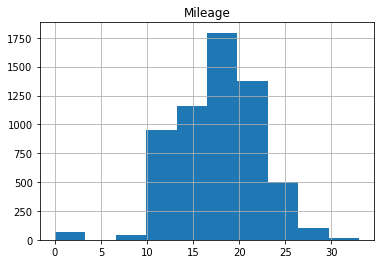

In [203]:
df_train.hist(column="Mileage")

In [204]:
tdf=df_train.loc[df_train["Fuel_Type"]=="Electric"]
tdf

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Years_old
4446,Mahindra E Verito D4,Chennai,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58 Lakh,13.00,Mahindra,4
4904,Toyota Prius 2009-2016 Z4,Mumbai,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,Toyota,9


Text(0, 58.0, '58.0')

Text(1, 108.0, '108.0')

Text(2, 83.0, '83.0')

Text(3, 58.0, '58.0')

Text(4, 57.0, '57.0')

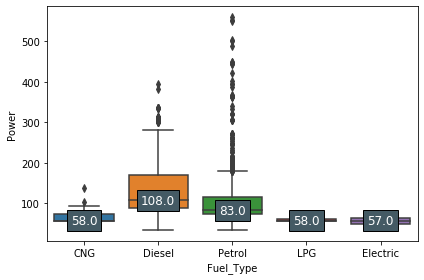

In [205]:
box_plot =sns.boxplot(x='Fuel_Type',y='Power', data=df_train)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median  line
    _y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        _y, 
        f'{_y}', 
        ha='center', 
        va='center', 
        fontweight='normal', 
        size=12,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()


Text(0, 998.0, '998.0')

Text(1, 1598.0, '1598.0')

Text(2, 1198.0, '1198.0')

Text(3, 1061.0, '1061.0')

Text(4, 935.0, '935.0')

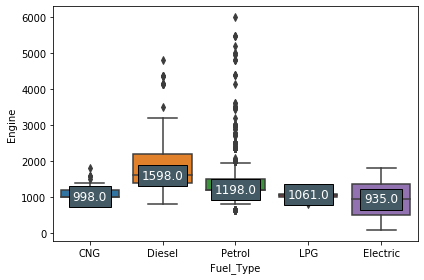

In [206]:
box_plot =sns.boxplot(x='Fuel_Type',y='Engine', data=df_train)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median  line
    _y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        _y, 
        f'{_y}', 
        ha='center', 
        va='center', 
        fontweight='normal', 
        size=12,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()


Text(0, 26.0, '26.0')

Text(1, 19.0, '19.0')

Text(2, 17.0, '17.0')

Text(3, 18.0, '18.0')

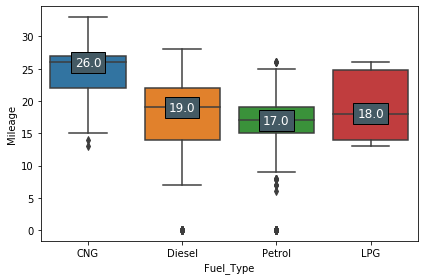

In [207]:
tmp=df_train.drop( df_train[ df_train['Fuel_Type'] == "Electric" ].index)
box_plot =sns.boxplot(x='Fuel_Type',y='Mileage', data=tmp)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median  line
    _y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        _y, 
        f'{_y}', 
        ha='center', 
        va='center', 
        fontweight='normal', 
        size=12,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

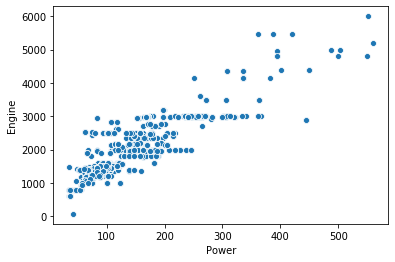

In [208]:
sns.scatterplot(y='Engine',x='Power', data=df_train)
# sns.scatterplot(y='Power',x='Mileage', data=df_train)

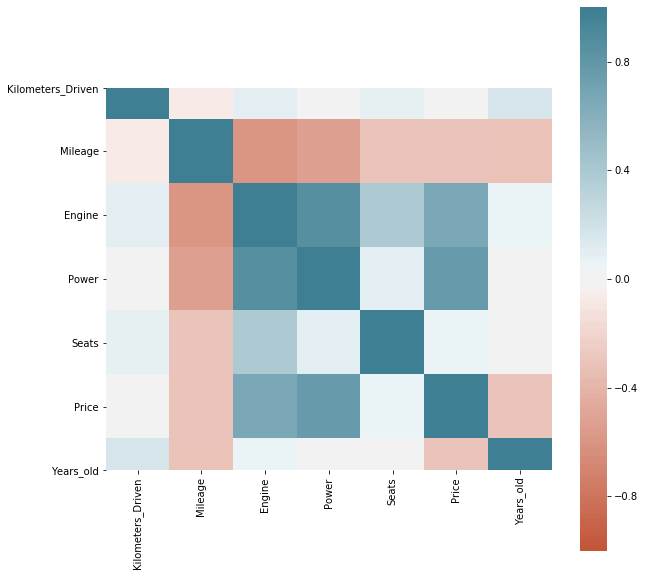

In [209]:
figsize(10,10)
sns.heatmap(df_train.corr(),vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
#plt.savefig('filename.png', dpi=300)

In [210]:
def inpute_engine(cols):
    Engine=cols[0]
    Fuel_Type=cols[1]
    if pd.isnull(Engine):
        if Fuel_Type == 'CNG':
            return 998
        elif Fuel_Type == 'Diesel':
            return 1598
        elif Fuel_Type == 'Petrol':
            return 1198
        elif Fuel_Type == 'LPG':
            return 1061
        else:
            return 935
    else:
        return Engine
        
def inpute_power(cols):
    Power=cols[0]
    Fuel_Type=cols[1]
    if pd.isnull(Power):
        if Fuel_Type == 'CNG':
            return 58
        elif Fuel_Type == 'Diesel':
            return 108
        elif Fuel_Type == 'Petrol':
            return 83
        elif Fuel_Type == 'LPG':
            return 58
        else:
            return 57
    else:
        return Power
    
def inpute_mileage(cols):
    Mileage=cols[0]
    Fuel_Type=cols[1]
    if Mileage==0:
        if Fuel_Type == 'CNG':
            return 26
        elif Fuel_Type == 'Diesel':
            return 19
        elif Fuel_Type == 'Petrol':
            return 17
        elif Fuel_Type == 'LPG':
            return 18
        else:
            return 20
    else:
        return Mileage
        

In [211]:
df_train['Power'] = df_train[['Power','Fuel_Type']].apply(inpute_power,axis=1)
df_train['Engine'] = df_train[['Engine','Fuel_Type']].apply(inpute_engine,axis=1)
df_train['Mileage'] = df_train[['Mileage','Fuel_Type']].apply(inpute_mileage,axis=1)

df_test['Power'] = df_test[['Power','Fuel_Type']].apply(inpute_power,axis=1)
df_test['Engine'] = df_test[['Engine','Fuel_Type']].apply(inpute_engine,axis=1)
df_test['Mileage'] = df_test[['Mileage','Fuel_Type']].apply(inpute_mileage,axis=1)

In [212]:
show_missing_count(df_train)

,Percent,Count
New_Price,86.310018,5195
Seats,0.697790,42
Mileage,0.033228,2


In [213]:
show_missing_count(df_test)

,Percent,Count
New_Price,85.251216,1052
Seats,0.891410,11


In [214]:
# df_train.fillna(df_train.mean(),inplace=True)
df_train['Seats'] = df_train['Seats'].replace(0.0,5.0,inplace=True)
df_train['Seats'].fillna(5,inplace=True)
df_train.fillna(df_train.mean(),inplace=True)

df_test['Seats'].fillna(5,inplace=True)
df_test.fillna(df_test.mean(),inplace=True)

In [215]:
show_missing_count(df_test)

,Percent,Count
New_Price,85.251216,1052


In [216]:
show_missing_count(df_train)

,Percent,Count
New_Price,86.310018,5195


In [217]:
df_train.head()
df_test.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Years_old
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.0,998.0,58.0,5,NaN,1.75,Maruti,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.0,1582.0,126.0,5,NaN,12.50,Hyundai,5
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.0,1199.0,88.0,5,8.61 Lakh,4.50,Honda,9
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.0,1248.0,88.0,5,NaN,6.00,Maruti,8
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.0,1968.0,140.0,5,NaN,17.74,Audi,7


,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Years_old
0,Maruti Alto K10 LXI CNG,Delhi,40929,CNG,Manual,First,32,998.0,58.0,4.0,NaN,Maruti,6
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,54493,Petrol,Manual,Second,24,796.0,47.0,5.0,NaN,Maruti,7
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,34000,Diesel,Manual,First,13,2393.0,147.0,7.0,25.27 Lakh,Toyota,3
3,Toyota Etios Liva GD,Hyderabad,139000,Diesel,Manual,First,23,1364.0,108.0,5.0,NaN,Toyota,8
4,Hyundai i20 Magna,Mumbai,29000,Petrol,Manual,First,18,1197.0,82.0,5.0,NaN,Hyundai,6


In [218]:
df_train.describe()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Years_old
count,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.0,6019.000000,6019.000000
mean,5.873838e+04,17.911584,1619.276458,112.438777,5.0,9.479468,6.641801
std,9.126884e+04,4.169932,600.245908,53.402757,0.0,11.187917,3.269742
min,1.710000e+02,6.000000,72.000000,34.000000,5.0,0.440000,1.000000
25%,3.400000e+04,15.000000,1198.000000,78.000000,5.0,3.500000,4.000000
50%,5.300000e+04,18.000000,1493.000000,94.000000,5.0,5.640000,6.000000
75%,7.300000e+04,21.000000,1969.000000,138.000000,5.0,9.950000,9.000000
max,6.500000e+06,33.000000,5998.000000,560.000000,5.0,160.000000,22.000000


In [219]:
df_test.describe()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Years_old
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,58507.288493,17.938412,1591.675851,109.678282,5.282010,6.599676
std,35598.702098,4.073864,562.728379,50.994086,0.822366,3.179700
min,1000.000000,7.000000,624.000000,34.000000,2.000000,1.000000
25%,34000.000000,15.000000,1198.000000,76.000000,5.000000,4.000000
50%,54572.500000,18.000000,1461.000000,93.000000,5.000000,6.000000
75%,75000.000000,21.000000,1968.000000,126.000000,5.000000,9.000000
max,350000.000000,32.000000,5998.000000,616.000000,10.000000,24.000000


In [220]:
fuel_type=pd.get_dummies(df_train['Fuel_Type'],drop_first=True)
owner_type=pd.get_dummies(df_train['Owner_Type'],drop_first=True)
transmission_type=pd.get_dummies(df_train['Transmission'],drop_first=True)
brand_type=pd.get_dummies(df_train['Brand'],drop_first=True)

In [221]:
df_train=pd.concat([df_train,fuel_type,owner_type,transmission_type,
                     brand_type
                   ],axis=1)
df_train = df_train.drop(['Fuel_Type','Owner_Type','Transmission','Brand','Name'],axis=1)

In [222]:
fuel_type=pd.get_dummies(df_test['Fuel_Type'],drop_first=True)
owner_type=pd.get_dummies(df_test['Owner_Type'],drop_first=True)
transmission_type=pd.get_dummies(df_test['Transmission'],drop_first=True)
brand_type=pd.get_dummies(df_test['Brand'],drop_first=True)

In [223]:
df_test = pd.concat([df_test,fuel_type,owner_type,transmission_type,
                      brand_type
                    ],axis=1)
df_test = df_test.drop(['Fuel_Type','Owner_Type','Transmission','Brand',"Name"],axis=1)

In [226]:
df_train.head()

,Location,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Years_old,Diesel,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,Mumbai,72000,26.0,998.0,58.0,5,NaN,1.75,10,0,...,0,0,0,0,0,0,0,0,0,0
1,Pune,41000,19.0,1582.0,126.0,5,NaN,12.50,5,1,...,0,0,0,0,0,0,0,0,0,0
2,Chennai,46000,18.0,1199.0,88.0,5,8.61 Lakh,4.50,9,0,...,0,0,0,0,0,0,0,0,0,0
3,Chennai,87000,20.0,1248.0,88.0,5,NaN,6.00,8,1,...,0,0,0,0,0,0,0,0,0,0
4,Coimbatore,40670,15.0,1968.0,140.0,5,NaN,17.74,7,1,...,0,0,0,0,0,0,0,0,0,0


In [227]:
df_test.head()

,Location,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Years_old,Diesel,LPG,...,Mitsubishi,Nissan,OpelCorsa,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,Delhi,40929,32,998.0,58.0,4.0,NaN,6,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Coimbatore,54493,24,796.0,47.0,5.0,NaN,7,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mumbai,34000,13,2393.0,147.0,7.0,25.27 Lakh,3,1,0,...,0,0,0,0,0,0,0,1,0,0
3,Hyderabad,139000,23,1364.0,108.0,5.0,NaN,8,1,0,...,0,0,0,0,0,0,0,1,0,0
4,Mumbai,29000,18,1197.0,82.0,5.0,NaN,6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [228]:
y=df_train['Price']

In [229]:
y = np.log1p(y.values)

In [232]:
X = df_train.drop(['Price',"New_Price","Location"],axis=1)

In [233]:
X_tr=df_test.drop(["New_Price","Location"],axis=1)

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

In [235]:
from sklearn.decomposition import PCA

def apply_pca(X,n,add_constant=False):

    sc=StandardScaler()
    X=sc.fit_transform(X)
    pca = PCA(n_components = n)
    x_new=pca.fit_transform(X)
    
    if add_constant is True:
        x_new=sm.add_constant(x_new)
        
    return pca,pd.DataFrame(x_new)
        

In [237]:
len(X.columns)

43

In [238]:
pca,_=apply_pca(X,len(X.columns))

In [239]:
print("Explained Variance : ", pca.explained_variance_ratio_)

Explained Variance :  [9.33447785e-02 5.15311970e-02 3.85548095e-02 3.04891379e-02
 2.88005067e-02 2.73725782e-02 2.69866616e-02 2.57938241e-02
 2.56469961e-02 2.52929671e-02 2.49691545e-02 2.48170949e-02
 2.46792093e-02 2.45293692e-02 2.43882554e-02 2.43284129e-02
 2.42543458e-02 2.41770832e-02 2.41289379e-02 2.39970296e-02
 2.39628521e-02 2.39532348e-02 2.39232001e-02 2.38944108e-02
 2.38516554e-02 2.38452995e-02 2.38281649e-02 2.38248601e-02
 2.35909254e-02 2.35045030e-02 2.31656579e-02 2.28805581e-02
 2.18668707e-02 2.13576972e-02 2.00776193e-02 1.34643397e-02
 8.31771951e-03 6.33113148e-03 4.43616669e-03 1.41931447e-03
 4.17099117e-04 4.37019201e-06 1.84090116e-32]


([<matplotlib.axis.XTick at 0x19a14ece320>,
 <a list of 50 Text xticklabel objects>)

Text(0.5, 0, 'n components')

Text(0, 0.5, 'cumilative variance')

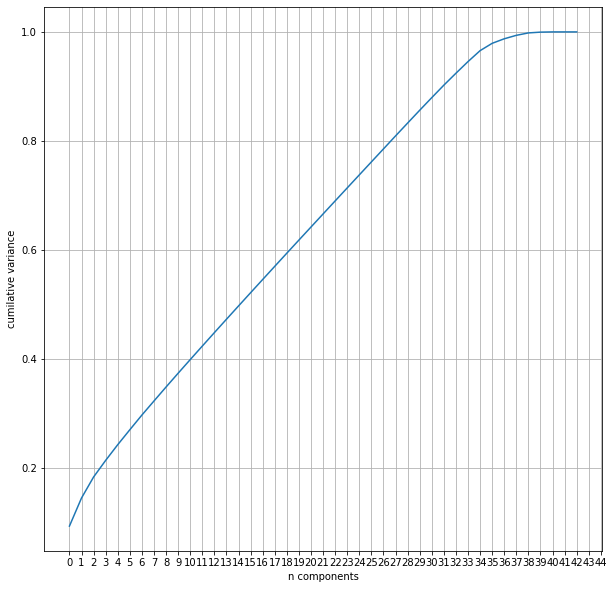

In [242]:

plt.xticks(np.arange(0,50,1))
plt.grid(True)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("n components")
plt.ylabel("cumilative variance")

In [243]:
no_of_features=39

In [244]:
def build_model(regression_fn,target,features,*hyperparameters):
    X=features
    Y=target
    
    _,X_new=apply_pca(X,*hyperparameters)
    
    x_train,x_test,y_train,y_test=train_test_split(X_new,Y,test_size=0.3)
    
    model = regression_fn(x_train,y_train)
    
    y_pred = model.predict(x_test)
    
    return {
        
        'x_initial':X,
        'x_transform':X_new,
        'x_train':x_train,
        'x_test':x_test,
        'y_train':y_train,
        'y_test':y_test,
        'y_pred':y_pred,
        'model':model
    }

In [245]:
def ols_reg(x_train,y_train):
    ols=sm.OLS(y_train,x_train)
    model=ols.fit()
    return model

In [246]:
def linear_reg(x_train,y_train):
    model=LinearRegression().fit(x_train,y_train)
    return model

In [247]:
def random_forest_reg(x_train,y_train):
    model=RandomForestRegressor(n_estimators=100, random_state=25)
    model.fit(x_train, y_train)
    return model

In [248]:
model_params={}

In [249]:
model_params['statsmodel_reg'] = build_model(ols_reg,y,
                                            X,no_of_features,True)

In [250]:
model         =model_params['statsmodel_reg']['model']
x_initial     =model_params['statsmodel_reg']['x_initial']
x_transform   =model_params['statsmodel_reg']['x_transform']
x_train       =model_params['statsmodel_reg']['x_train']
x_test        =model_params['statsmodel_reg']['x_test']
y_train       =model_params['statsmodel_reg']['y_train']
y_test        =model_params['statsmodel_reg']['y_test']
y_pred        =model_params['statsmodel_reg']['y_pred']


In [251]:
print('Rsquared: ',model.rsquared)
print('Adj Rsquared: ',model.rsquared_adj)
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred)) 
# print('Accuracy: ',model.score(x_test,y_test))

Rsquared:  0.9148743397367622
Adj Rsquared:  0.9140787728184142
Mean Absolute Error:  0.22254830507684514


In [252]:
model_params['sklearn_reg'] = build_model(linear_reg,y,
                                            X,no_of_features)

In [253]:
model         =model_params['sklearn_reg']['model']
x_initial     =model_params['sklearn_reg']['x_initial']
x_transform   =model_params['sklearn_reg']['x_transform']
x_train       =model_params['sklearn_reg']['x_train']
x_test        =model_params['sklearn_reg']['x_test']
y_train       =model_params['sklearn_reg']['y_train']
y_test        =model_params['sklearn_reg']['y_test']
y_pred        =model_params['sklearn_reg']['y_pred']

In [254]:
print('Training Score: ',model.score(x_train,y_train))
print('Adj Rsquared: ',r2_score(y_test,y_pred))
print('Accuracy: ',model.score(x_test,y_test))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred)) 

Training Score:  0.9184965921261472
Adj Rsquared:  -105.04759195703593
Accuracy:  -105.04759195703593
Mean Absolute Error:  0.3531011350827529


In [255]:
model_params['random_forest_reg'] = build_model(random_forest_reg,y,
                                            X,no_of_features)

In [256]:
model         =model_params['random_forest_reg']['model']
x_initial     =model_params['random_forest_reg']['x_initial']
x_transform   =model_params['random_forest_reg']['x_transform']
x_train       =model_params['random_forest_reg']['x_train']
x_test        =model_params['random_forest_reg']['x_test']
y_train       =model_params['random_forest_reg']['y_train']
y_test        =model_params['random_forest_reg']['y_test']
y_pred        =model_params['random_forest_reg']['y_pred']

In [257]:
print('Training Score: ',model.score(x_train,y_train))
print('Adj Rsquared: ',r2_score(y_test,y_pred))
print('Accuracy: ',model.score(x_test,y_test))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred)) 

Training Score:  0.9889966850441145
Adj Rsquared:  0.9302862294849833
Accuracy:  0.9302862294849833
Mean Absolute Error:  0.14235106496506567


<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Visualizing the Regression using Random Forest Regression algorithm')

Text(0.5, 0, 'Predicted Price')

Text(0, 0.5, 'Orig Price')

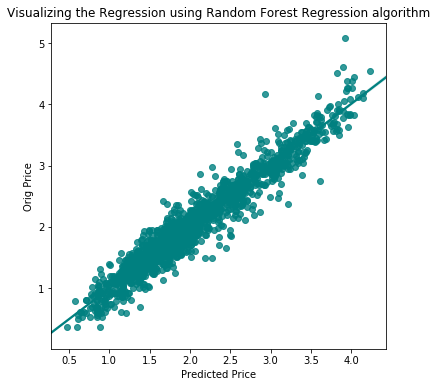

In [258]:
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Random Forest Regression algorithm")
sns.regplot(y_pred, y_test, color = "teal")
plt.xlabel("Predicted Price")
plt.ylabel("Orig Price")
plt.show()

In [259]:
_,X_tr_new=apply_pca(X_tr,no_of_features)

In [260]:
y_final=model.predict(X_tr_new)

In [261]:
y_final = np.expm1(y_final)

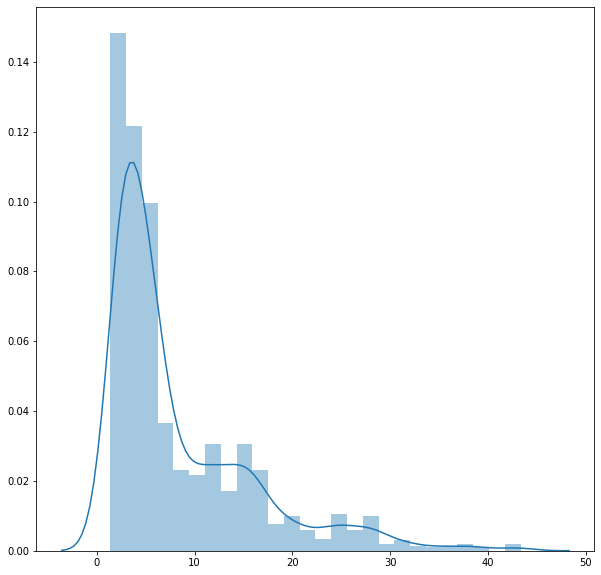

In [262]:
sns.distplot(y_final)

In [263]:
X_final = pd.concat([df_test_orig,pd.Series(y_final,name="Price")],axis=1)

In [264]:
y_final

array([ 4.41051688,  2.45976198, 12.7564562 , ...,  4.77172367,
        2.19822655, 13.60700769])

In [265]:
X_final.to_csv("Result.csv")

In [270]:
pd.DataFrame(y_final,columns=["Price"],index=None).to_csv("Fs.csv",index=False)
